# Práctica 0: Flujo Completo de Machine Learning
## Dataset: Estimation of Obesity Levels Based on Eating Habits and Physical Condition

**Autor:** Jordi Blasco Lozano  
**DNI:** 74527208D  
**Email:** jbl42@alu.ua.es  
**Asignatura:** Aprendizaje Avanzado - Curso 2025/2026  
**Universidad de Alicante - Escuela Politécnica Superior**

## 1. Carga y Exploración Inicial de Datos

In [138]:
# Importaciones necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Configuración de visualización
sns.set_palette('husl')

In [139]:
# Cargar el dataset de obesidad desde CSV
# Dataset descargado de: https://archive.ics.uci.edu/dataset/544
df = pd.read_csv('data/ObesityDataSet_raw_and_data_sinthetic.csv')

print("=" * 50)
print("INFORMACIÓN DEL DATASET")
print("=" * 50)
print(f"\nShape: {df.shape}")
print(f"Número de filas: {df.shape[0]}")
print(f"Número de columnas: {df.shape[1]}")

INFORMACIÓN DEL DATASET

Shape: (2111, 17)
Número de filas: 2111
Número de columnas: 17


In [140]:
# Tipos de datos
print("=" * 50)
print("TIPOS DE DATOS")
print("=" * 50)
print(df.dtypes)
print("\n" + "=" * 50)
print("PRIMERAS FILAS")
print("=" * 50)
df.head()

TIPOS DE DATOS
Gender                             object
Age                               float64
Height                            float64
Weight                            float64
family_history_with_overweight     object
FAVC                               object
FCVC                              float64
NCP                               float64
CAEC                               object
SMOKE                              object
CH2O                              float64
SCC                                object
FAF                               float64
TUE                               float64
CALC                               object
MTRANS                             object
NObeyesdad                         object
dtype: object

PRIMERAS FILAS


,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [141]:
# Información general del dataset
print("=" * 50)
print("INFORMACIÓN GENERAL")
print("=" * 50)
print(df.info())
print("\n" + "=" * 50)
print("VALORES FALTANTES")
print("=" * 50)
print(df.isnull().sum())

INFORMACIÓN GENERAL
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF           

In [142]:
# Identificar columnas numéricas y categóricas
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

# Remover la variable objetivo si está en las listas
target_col = 'NObeyesdad'
if target_col in categorical_cols:
    categorical_cols.remove(target_col)

print(f"Variables numéricas ({len(numeric_cols)}): {numeric_cols}")
print(f"\nVariables categóricas ({len(categorical_cols)}): {categorical_cols}")
print(f"\nVariable objetivo: {target_col}")

Variables numéricas (8): ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']

Variables categóricas (8): ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS']

Variable objetivo: NObeyesdad


## 2. Análisis Exploratorio de Datos (EDA)

### 2.1 Estadística Descriptiva

In [143]:
# Estadísticas descriptivas de variables numéricas
print("=" * 60)
print("ESTADÍSTICAS DESCRIPTIVAS - VARIABLES NUMÉRICAS")
print("=" * 60)
df[numeric_cols].describe().round(2)

ESTADÍSTICAS DESCRIPTIVAS - VARIABLES NUMÉRICAS


,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.00,2111.00,2111.00,2111.00,2111.00,2111.00,2111.00,2111.00
mean,24.31,1.70,86.59,2.42,2.69,2.01,1.01,0.66
std,6.35,0.09,26.19,0.53,0.78,0.61,0.85,0.61
min,14.00,1.45,39.00,1.00,1.00,1.00,0.00,0.00
25%,19.95,1.63,65.47,2.00,2.66,1.58,0.12,0.00
50%,22.78,1.70,83.00,2.39,3.00,2.00,1.00,0.63
75%,26.00,1.77,107.43,3.00,3.00,2.48,1.67,1.00
max,61.00,1.98,173.00,3.00,4.00,3.00,3.00,2.00


In [144]:
# Frecuencias de variables categóricas
print("=" * 60)
print("FRECUENCIAS - VARIABLES CATEGÓRICAS")
print("=" * 60)
for col in categorical_cols:
    print(f"\n{col}:")
    print(df[col].value_counts())

FRECUENCIAS - VARIABLES CATEGÓRICAS

Gender:
Gender
Male      1068
Female    1043
Name: count, dtype: int64

family_history_with_overweight:
family_history_with_overweight
yes    1726
no      385
Name: count, dtype: int64

FAVC:
FAVC
yes    1866
no      245
Name: count, dtype: int64

CAEC:
CAEC
Sometimes     1765
Frequently     242
Always          53
no              51
Name: count, dtype: int64

SMOKE:
SMOKE
no     2067
yes      44
Name: count, dtype: int64

SCC:
SCC
no     2015
yes      96
Name: count, dtype: int64

CALC:
CALC
Sometimes     1401
no             639
Frequently      70
Always           1
Name: count, dtype: int64

MTRANS:
MTRANS
Public_Transportation    1580
Automobile                457
Walking                    56
Motorbike                  11
Bike                        7
Name: count, dtype: int64


### 2.2 Distribuciones Univariadas

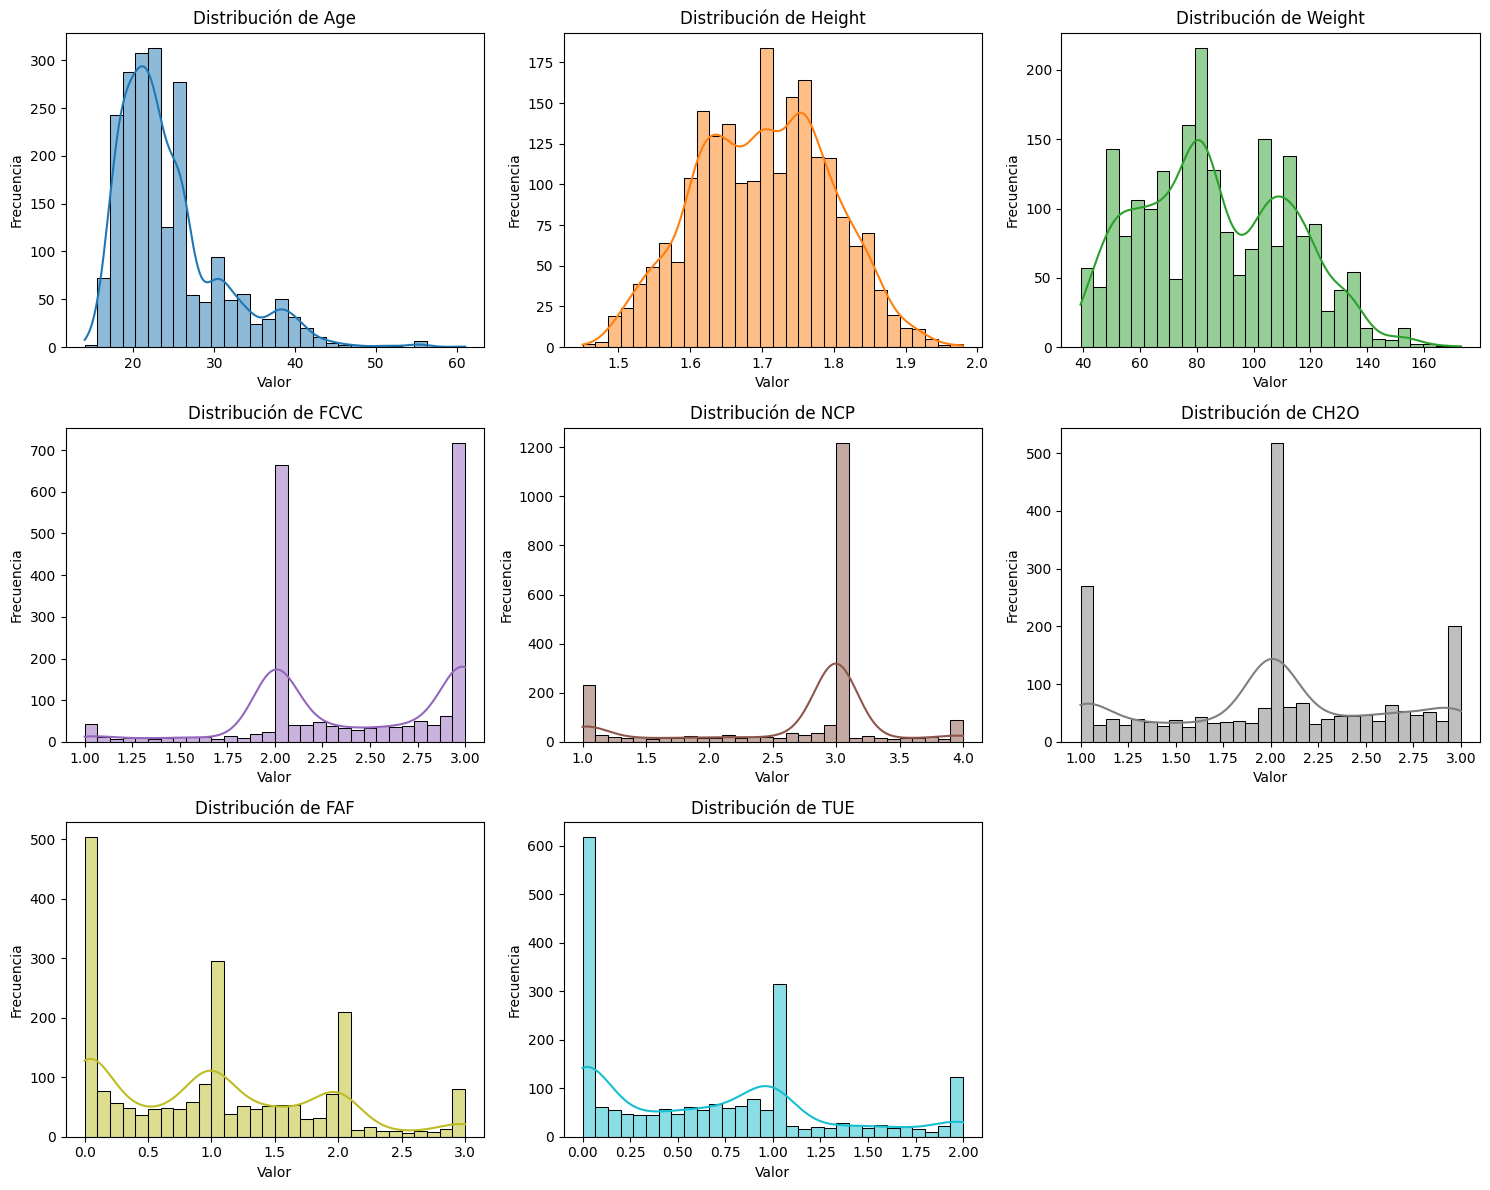

In [145]:
# Histogramas de variables numéricas
n_numeric = len(numeric_cols)
n_cols = 3
n_rows = (n_numeric + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 4*n_rows))
axes = axes.flatten()

# Usar colores de tab10 que es compatible con todas las versiones de matplotlib
colors = plt.cm.tab10(np.linspace(0, 1, n_numeric))

for idx, col in enumerate(numeric_cols):
    sns.histplot(data=df, x=col, kde=True, bins=30, ax=axes[idx], color=colors[idx])
    axes[idx].set_title(f'Distribución de {col}')
    axes[idx].set_xlabel('Valor')
    axes[idx].set_ylabel('Frecuencia')

# Ocultar ejes vacíos
for idx in range(n_numeric, len(axes)):
    axes[idx].set_visible(False)

plt.tight_layout()
plt.savefig('images/distribuciones_univariadas.png', dpi=300, bbox_inches='tight')
plt.show()

### 2.3 Detección de Outliers

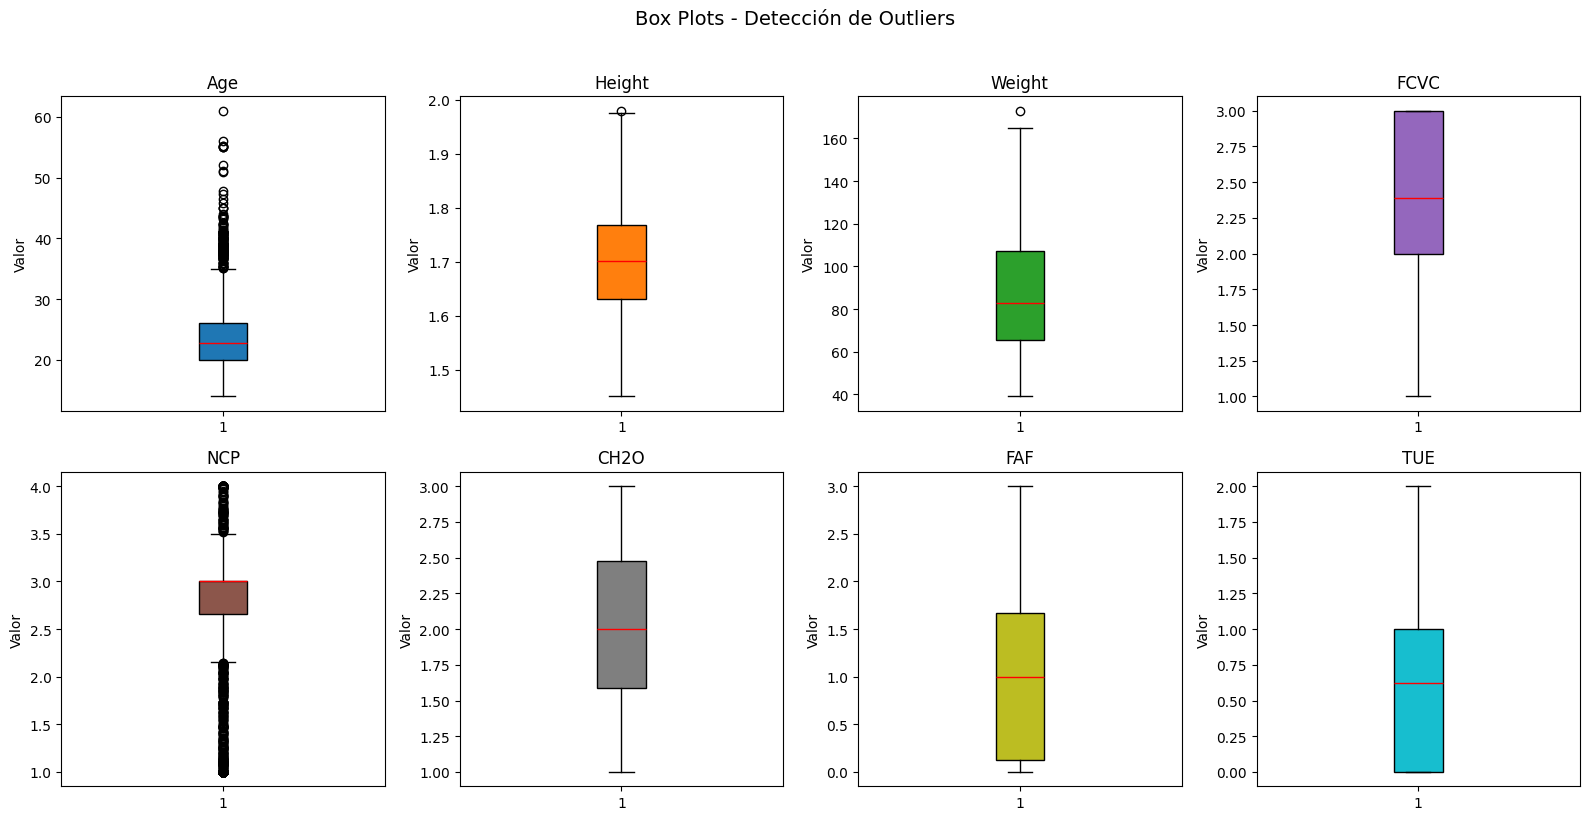

In [146]:
# Box plots para detección de outliers
fig, axes = plt.subplots(2, 4, figsize=(16, 8))
axes = axes.flatten()

colors = plt.cm.tab10(np.linspace(0, 1, len(numeric_cols)))

for idx, col in enumerate(numeric_cols):
    bp = axes[idx].boxplot(df[col].dropna(), patch_artist=True)
    bp['boxes'][0].set_facecolor(colors[idx])
    bp['medians'][0].set_color('red')
    axes[idx].set_title(col)
    axes[idx].set_ylabel('Valor')

# Ocultar ejes vacíos
for idx in range(len(numeric_cols), len(axes)):
    axes[idx].set_visible(False)

plt.suptitle('Box Plots - Detección de Outliers', fontsize=14, y=1.02)
plt.tight_layout()
plt.savefig('images/boxplots.png', dpi=300, bbox_inches='tight')
plt.show()

In [147]:
# Contar outliers por variable usando IQR
print("=" * 50)
print("OUTLIERS DETECTADOS (Método IQR)")
print("=" * 50)

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = ((df[col] < Q1 - 1.5*IQR) | (df[col] > Q3 + 1.5*IQR)).sum()
    print(f"{col}: {outliers} outliers ({100*outliers/len(df):.2f}%)")

OUTLIERS DETECTADOS (Método IQR)
Age: 168 outliers (7.96%)
Height: 1 outliers (0.05%)
Weight: 1 outliers (0.05%)
FCVC: 0 outliers (0.00%)
NCP: 579 outliers (27.43%)
CH2O: 0 outliers (0.00%)
FAF: 0 outliers (0.00%)
TUE: 0 outliers (0.00%)


### 2.3.b Filtrado de Outliers y Análisis de Transformaciones
Siguiendo las indicaciones, procedemos a:
1. Eliminar outliers de **Weight** y **Height**.
2. Verificar escalas y mostrar versión normalizada.
3. Analizar transformaciones para **Age**.
4. Evaluar Z-score para **NCP**.

Eliminacion de los valores individuales fuera de rango de Weight y Height

In [148]:
print("\n" + "="*50)
print("ESTADÍSTICAS VARIABLES ORIGINALES")
print("="*50)
display(df[numeric_cols].describe().loc[['min', 'max', 'mean', 'std']].round(2))


ESTADÍSTICAS VARIABLES ORIGINALES


,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
min,14.00,1.45,39.00,1.00,1.00,1.00,0.00,0.00
max,61.00,1.98,173.00,3.00,4.00,3.00,3.00,2.00
mean,24.31,1.70,86.59,2.42,2.69,2.01,1.01,0.66
std,6.35,0.09,26.19,0.53,0.78,0.61,0.85,0.61


In [149]:
# 1. Eliminar outliers para Weight y Height
initial_rows = len(df)
cols_to_clean = ['Weight', 'Height']
mask_clean = pd.Series(True, index=df.index)

for col in cols_to_clean:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    mask_clean = mask_clean & (df[col] >= lower_bound) & (df[col] <= upper_bound)

df_clean = df[mask_clean].copy()
rows_removed = initial_rows - len(df_clean)

print(f"Filas iniciales: {initial_rows}")
print(f"Filas eliminadas (Weight/Height outliers): {rows_removed}")
print(f"Filas restantes: {len(df_clean)}")

df = df_clean.reset_index(drop=True)

Filas iniciales: 2111
Filas eliminadas (Weight/Height outliers): 2
Filas restantes: 2109


In [150]:
# 2. Transformaciones y Verificación de Escalas
from scipy import stats
from sklearn.preprocessing import StandardScaler

# --- 2.1 Transformación Box-Cox para Age ---
# Esta transformación sí cambia la forma de la distribución para corregir el sesgo
df['Age'], lambda_val = stats.boxcox(df['Age'] + 1)
print(f"✓ Transformación Box-Cox aplicada a 'Age' (Lambda: {lambda_val:.4f})")

✓ Transformación Box-Cox aplicada a 'Age' (Lambda: -1.6415)


In [ ]:
# --- 2.3 Estandarización Global (Simulación) ---
# Estandarizamos todas las variables para verificar que quedan entre -3 y 3 aprox, si hay outliers como en age o NCP podrán salir valores fuera de este rango
scaler_global = StandardScaler()
df_scaled_global = pd.DataFrame(scaler_global.fit_transform(df[numeric_cols]), columns=numeric_cols)

print("\n" + "="*50)
print("ESTADÍSTICAS VARIABLES ESCALADAS (StandardScaler)")
print("="*50)
display(df_scaled_global.describe().loc[['min', 'max']].round(2))


ESTADÍSTICAS VARIABLES ESCALADAS (StandardScaler)


,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
min,-3.51,-2.70,-1.82,-2.66,-2.17,-1.64,-1.19,-1.08
max,2.47,2.95,3.01,1.09,1.69,1.62,2.34,2.20


### 2.4 Correlaciones

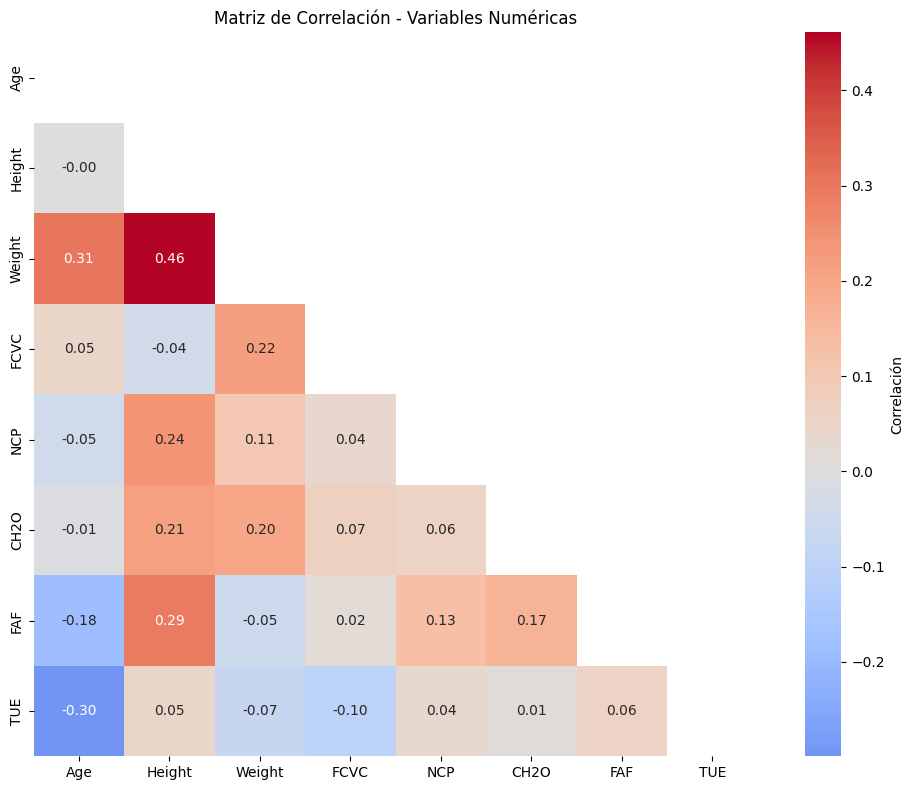


Correlaciones más fuertes:
             Age    Height    Weight      FCVC       NCP      CH2O       FAF  \
Age     1.000000 -0.001125  0.305268  0.048742 -0.046641 -0.009348 -0.183551   
Height -0.001125  1.000000  0.460991 -0.038068  0.243476  0.211840  0.294675   
Weight  0.305268  0.460991  1.000000  0.215728  0.106895  0.200213 -0.053431   
FCVC    0.048742 -0.038068  0.215728  1.000000  0.042179  0.069142  0.019349   
NCP    -0.046641  0.243476  0.106895  0.042179  1.000000  0.056820  0.129335   
CH2O   -0.009348  0.211840  0.200213  0.069142  0.056820  1.000000  0.167410   
FAF    -0.183551  0.294675 -0.053431  0.019349  0.129335  0.167410  1.000000   
TUE    -0.299140  0.050790 -0.073069 -0.101274  0.036118  0.011546  0.058283   

             TUE  
Age    -0.299140  
Height  0.050790  
Weight -0.073069  
FCVC   -0.101274  
NCP     0.036118  
CH2O    0.011546  
FAF     0.058283  
TUE     1.000000  


In [152]:
# Matriz de correlación para variables numéricas
corr_matrix = df[numeric_cols].corr()

fig, ax = plt.subplots(figsize=(10, 8))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0,
            square=True, ax=ax, cbar_kws={'label': 'Correlación'}, mask=mask)
ax.set_title('Matriz de Correlación - Variables Numéricas')
plt.tight_layout()
plt.savefig('images/correlacion_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

print("\nCorrelaciones más fuertes:")
print(corr_matrix)

### 2.5 Distribución de la Variable Objetivo

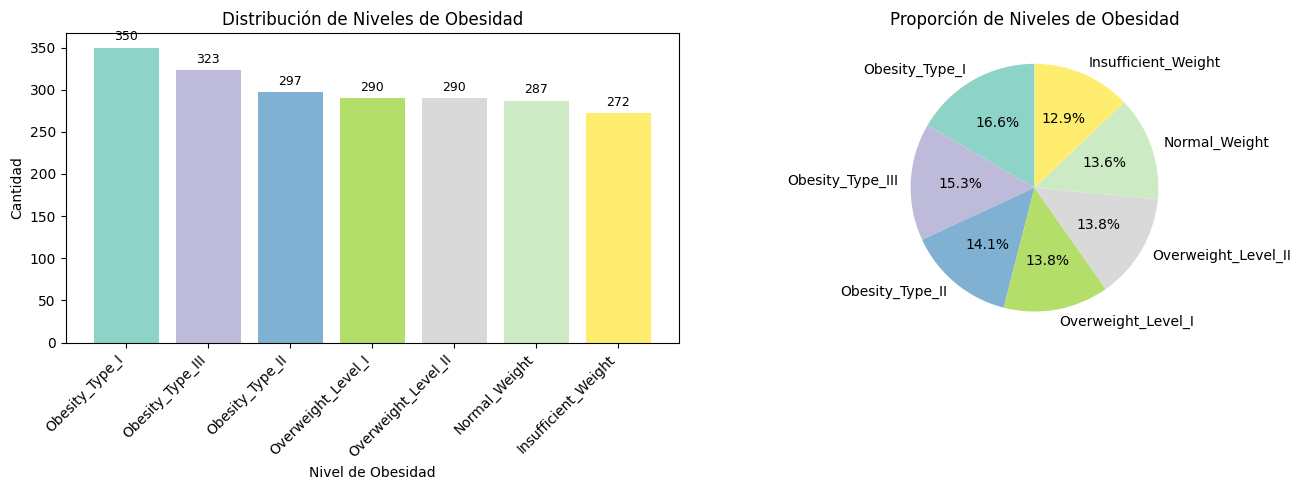


Conteo de clases:
NObeyesdad
Obesity_Type_I         350
Obesity_Type_III       323
Obesity_Type_II        297
Overweight_Level_I     290
Overweight_Level_II    290
Normal_Weight          287
Insufficient_Weight    272
Name: count, dtype: int64


In [153]:
# Distribución de clases
class_counts = df[target_col].value_counts()

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Bar plot
colors_classes = plt.cm.Set3(np.linspace(0, 1, len(class_counts)))
bars = axes[0].bar(range(len(class_counts)), class_counts.values, color=colors_classes)
axes[0].set_xticks(range(len(class_counts)))
axes[0].set_xticklabels(class_counts.index, rotation=45, ha='right')
axes[0].set_title('Distribución de Niveles de Obesidad')
axes[0].set_xlabel('Nivel de Obesidad')
axes[0].set_ylabel('Cantidad')

# Añadir valores sobre las barras
for bar, count in zip(bars, class_counts.values):
    axes[0].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 5,
                 str(count), ha='center', va='bottom', fontsize=9)

# Pie chart
axes[1].pie(class_counts.values, labels=class_counts.index, autopct='%1.1f%%',
            colors=colors_classes, startangle=90)
axes[1].set_title('Proporción de Niveles de Obesidad')

plt.tight_layout()
plt.savefig('images/class_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

print("\nConteo de clases:")
print(class_counts)

### 2.6 Scatter Plots por Clase

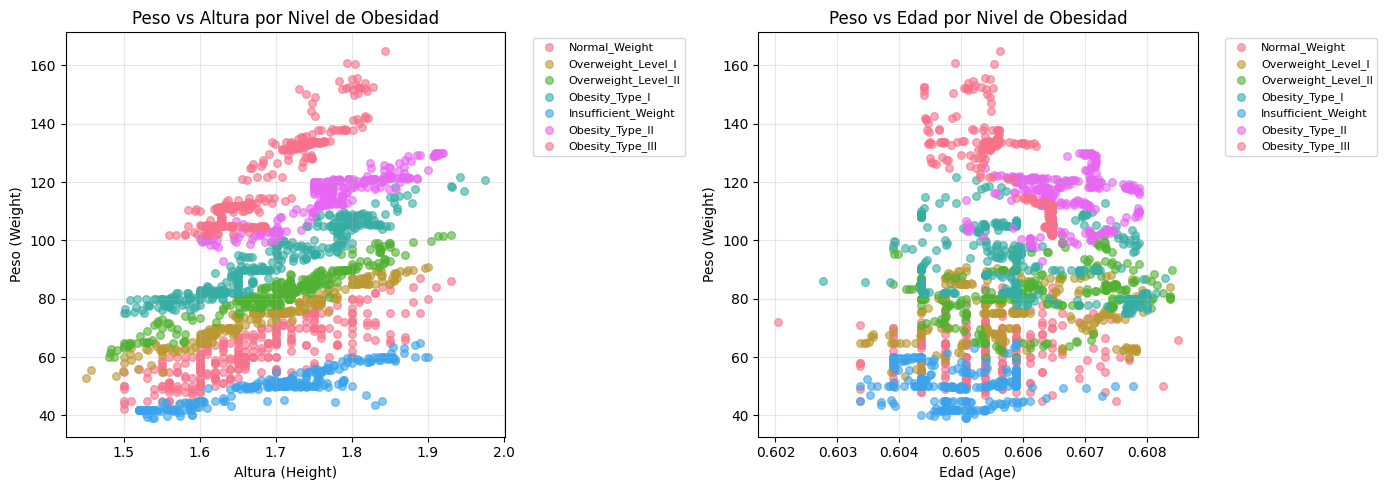

In [154]:
# Scatter plots de las variables más relevantes
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Weight vs Height
for label in df[target_col].unique():
    mask = df[target_col] == label
    axes[0].scatter(df[mask]['Height'], df[mask]['Weight'], label=label, alpha=0.6, s=30)
axes[0].set_xlabel('Altura (Height)')
axes[0].set_ylabel('Peso (Weight)')
axes[0].set_title('Peso vs Altura por Nivel de Obesidad')
axes[0].legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=8)
axes[0].grid(True, alpha=0.3)

# Age vs Weight
for label in df[target_col].unique():
    mask = df[target_col] == label
    axes[1].scatter(df[mask]['Age'], df[mask]['Weight'], label=label, alpha=0.6, s=30)
axes[1].set_xlabel('Edad (Age)')
axes[1].set_ylabel('Peso (Weight)')
axes[1].set_title('Peso vs Edad por Nivel de Obesidad')
axes[1].legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=8)
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('images/scatter_plots.png', dpi=300, bbox_inches='tight')
plt.show()

### 2.7 Visualización PCA

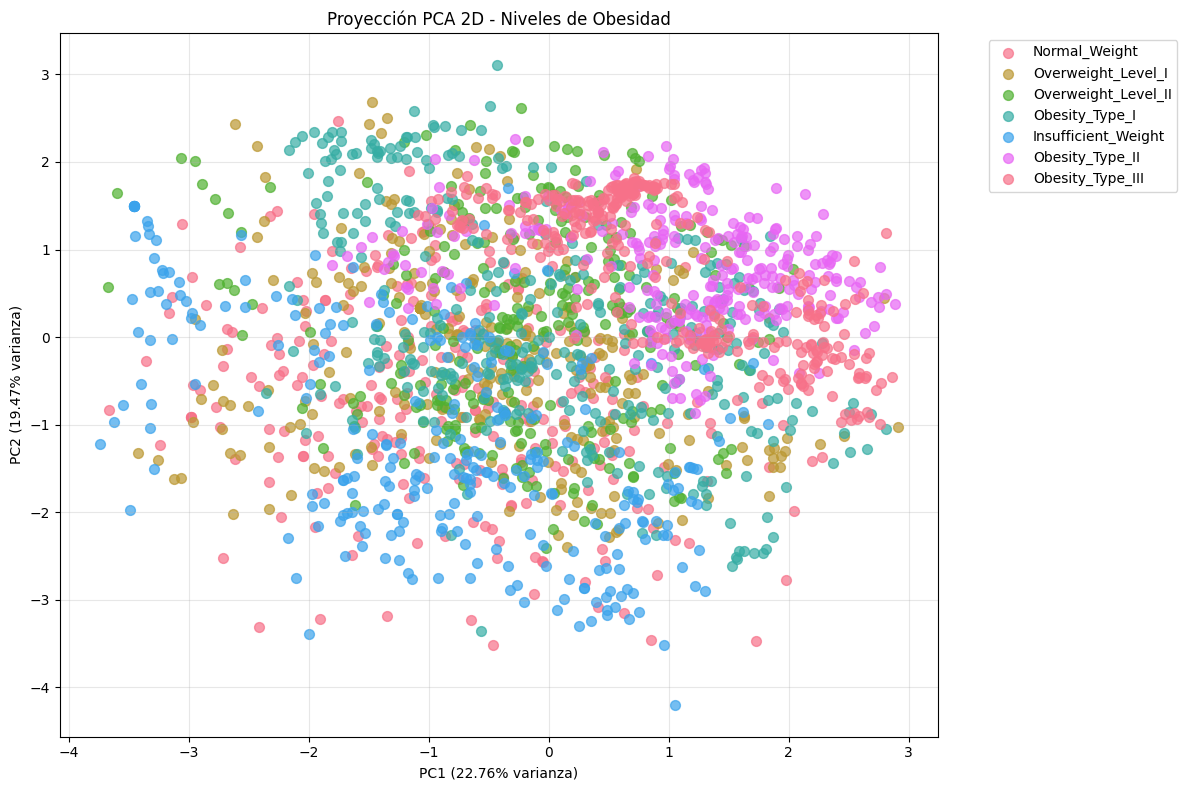


Varianza explicada por componente:
PC1: 22.76%
PC2: 19.47%
Total: 42.23%


In [155]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Preparar datos para PCA (solo numéricas, estandarizadas)
X_numeric = df[numeric_cols].copy()
scaler_pca = StandardScaler()
X_scaled_pca = scaler_pca.fit_transform(X_numeric)

# Aplicar PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled_pca)

# Visualización
fig, ax = plt.subplots(figsize=(12, 8))

for label in df[target_col].unique():
    mask = df[target_col] == label
    ax.scatter(X_pca[mask, 0], X_pca[mask, 1], label=label, s=50, alpha=0.7)

ax.set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.2%} varianza)')
ax.set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.2%} varianza)')
ax.set_title('Proyección PCA 2D - Niveles de Obesidad')
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('images/pca_visualization.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"\nVarianza explicada por componente:")
print(f"PC1: {pca.explained_variance_ratio_[0]:.2%}")
print(f"PC2: {pca.explained_variance_ratio_[1]:.2%}")
print(f"Total: {sum(pca.explained_variance_ratio_):.2%}")

## 3. Preprocesamiento de Datos

In [156]:
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Separar features y target
X = df.drop(columns=[target_col])
y = df[target_col]

# Codificar la variable objetivo
le_target = LabelEncoder()
y_encoded = le_target.fit_transform(y)

print("Clases codificadas:")
for i, label in enumerate(le_target.classes_):
    print(f"  {i}: {label}")

Clases codificadas:
  0: Insufficient_Weight
  1: Normal_Weight
  2: Obesity_Type_I
  3: Obesity_Type_II
  4: Obesity_Type_III
  5: Overweight_Level_I
  6: Overweight_Level_II


In [157]:
# Codificar variables categóricas de features
X_processed = X.copy()

# Label encoding para variables binarias
binary_cols = ['Gender', 'family_history_with_overweight', 'FAVC', 'SMOKE', 'SCC']
for col in binary_cols:
    if col in X_processed.columns:
        le = LabelEncoder()
        X_processed[col] = le.fit_transform(X_processed[col])

# One-hot encoding para variables con múltiples categorías
multi_cat_cols = ['CAEC', 'CALC', 'MTRANS']
X_processed = pd.get_dummies(X_processed, columns=multi_cat_cols, drop_first=True)

print(f"Shape original: {X.shape}")
print(f"Shape después de encoding: {X_processed.shape}")
print(f"\nColumnas finales:")
print(X_processed.columns.tolist())

Shape original: (2109, 16)
Shape después de encoding: (2109, 23)

Columnas finales:
['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight', 'FAVC', 'FCVC', 'NCP', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE', 'CAEC_Frequently', 'CAEC_Sometimes', 'CAEC_no', 'CALC_Frequently', 'CALC_Sometimes', 'CALC_no', 'MTRANS_Bike', 'MTRANS_Motorbike', 'MTRANS_Public_Transportation', 'MTRANS_Walking']


In [158]:
# Train-Test Split (80-20, estratificado)
X_train, X_test, y_train, y_test = train_test_split(
    X_processed, y_encoded, 
    test_size=0.2, 
    random_state=42, 
    stratify=y_encoded
)

print("=" * 50)
print("DIVISIÓN TRAIN-TEST")
print("=" * 50)
print(f"Train: {X_train.shape[0]} muestras ({100*X_train.shape[0]/len(X_processed):.0f}%)")
print(f"Test: {X_test.shape[0]} muestras ({100*X_test.shape[0]/len(X_processed):.0f}%)")

# Verificar estratificación
print("\nDistribución de clases en Train:")
unique, counts = np.unique(y_train, return_counts=True)
for u, c in zip(unique, counts):
    print(f"  Clase {u}: {c} ({100*c/len(y_train):.1f}%)")

DIVISIÓN TRAIN-TEST
Train: 1687 muestras (80%)
Test: 422 muestras (20%)

Distribución de clases en Train:
  Clase 0: 218 (12.9%)
  Clase 1: 230 (13.6%)
  Clase 2: 280 (16.6%)
  Clase 3: 237 (14.0%)
  Clase 4: 258 (15.3%)
  Clase 5: 232 (13.8%)
  Clase 6: 232 (13.8%)


## 4. Entrenamiento y Evaluación de Modelos

In [159]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report
)

# Diccionario para almacenar resultados
results = {}

### 4.1 Regresión Logística

In [160]:
# Modelo: Regresión Logística
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train_scaled, y_train)

# Predicciones
y_pred_lr = lr_model.predict(X_test_scaled)

# Métricas
results['Logistic Regression'] = {
    'accuracy': accuracy_score(y_test, y_pred_lr),
    'precision': precision_score(y_test, y_pred_lr, average='weighted'),
    'recall': recall_score(y_test, y_pred_lr, average='weighted'),
    'f1': f1_score(y_test, y_pred_lr, average='weighted')
}

print("=" * 50)
print("REGRESIÓN LOGÍSTICA")
print("=" * 50)
print(f"Accuracy: {results['Logistic Regression']['accuracy']:.4f}")
print(f"Precision: {results['Logistic Regression']['precision']:.4f}")
print(f"Recall: {results['Logistic Regression']['recall']:.4f}")
print(f"F1-Score: {results['Logistic Regression']['f1']:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_lr, target_names=le_target.classes_))

REGRESIÓN LOGÍSTICA
Accuracy: 0.8720
Precision: 0.8708
Recall: 0.8720
F1-Score: 0.8705

Classification Report:
                     precision    recall  f1-score   support

Insufficient_Weight       0.90      1.00      0.95        54
      Normal_Weight       0.77      0.72      0.75        57
     Obesity_Type_I       0.90      0.86      0.88        70
    Obesity_Type_II       0.89      0.97      0.93        60
   Obesity_Type_III       0.98      0.98      0.98        65
 Overweight_Level_I       0.76      0.78      0.77        58
Overweight_Level_II       0.87      0.79      0.83        58

           accuracy                           0.87       422
          macro avg       0.87      0.87      0.87       422
       weighted avg       0.87      0.87      0.87       422



### 4.2 Random Forest

In [161]:
# Modelo: Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf_model.fit(X_train_scaled, y_train)

# Predicciones
y_pred_rf = rf_model.predict(X_test_scaled)

# Métricas
results['Random Forest'] = {
    'accuracy': accuracy_score(y_test, y_pred_rf),
    'precision': precision_score(y_test, y_pred_rf, average='weighted'),
    'recall': recall_score(y_test, y_pred_rf, average='weighted'),
    'f1': f1_score(y_test, y_pred_rf, average='weighted')
}

print("=" * 50)
print("RANDOM FOREST")
print("=" * 50)
print(f"Accuracy: {results['Random Forest']['accuracy']:.4f}")
print(f"Precision: {results['Random Forest']['precision']:.4f}")
print(f"Recall: {results['Random Forest']['recall']:.4f}")
print(f"F1-Score: {results['Random Forest']['f1']:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf, target_names=le_target.classes_))

RANDOM FOREST
Accuracy: 0.9597
Precision: 0.9665
Recall: 0.9597
F1-Score: 0.9605

Classification Report:
                     precision    recall  f1-score   support

Insufficient_Weight       1.00      0.93      0.96        54
      Normal_Weight       0.80      1.00      0.89        57
     Obesity_Type_I       0.96      1.00      0.98        70
    Obesity_Type_II       1.00      0.98      0.99        60
   Obesity_Type_III       1.00      1.00      1.00        65
 Overweight_Level_I       1.00      0.86      0.93        58
Overweight_Level_II       1.00      0.93      0.96        58

           accuracy                           0.96       422
          macro avg       0.97      0.96      0.96       422
       weighted avg       0.97      0.96      0.96       422



### 4.3 Support Vector Machine (SVM)

In [162]:
# Modelo: SVM con kernel RBF
svm_model = SVC(kernel='rbf', C=1.0, random_state=42)
svm_model.fit(X_train_scaled, y_train)

# Predicciones
y_pred_svm = svm_model.predict(X_test_scaled)

# Métricas
results['SVM'] = {
    'accuracy': accuracy_score(y_test, y_pred_svm),
    'precision': precision_score(y_test, y_pred_svm, average='weighted'),
    'recall': recall_score(y_test, y_pred_svm, average='weighted'),
    'f1': f1_score(y_test, y_pred_svm, average='weighted')
}

print("=" * 50)
print("SVM (RBF)")
print("=" * 50)
print(f"Accuracy: {results['SVM']['accuracy']:.4f}")
print(f"Precision: {results['SVM']['precision']:.4f}")
print(f"Recall: {results['SVM']['recall']:.4f}")
print(f"F1-Score: {results['SVM']['f1']:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_svm, target_names=le_target.classes_))

SVM (RBF)
Accuracy: 0.8768
Precision: 0.8833
Recall: 0.8768
F1-Score: 0.8786

Classification Report:
                     precision    recall  f1-score   support

Insufficient_Weight       0.96      0.94      0.95        54
      Normal_Weight       0.64      0.74      0.68        57
     Obesity_Type_I       0.92      0.96      0.94        70
    Obesity_Type_II       0.98      0.93      0.96        60
   Obesity_Type_III       1.00      0.98      0.99        65
 Overweight_Level_I       0.78      0.81      0.80        58
Overweight_Level_II       0.88      0.74      0.80        58

           accuracy                           0.88       422
          macro avg       0.88      0.87      0.87       422
       weighted avg       0.88      0.88      0.88       422



### 4.4 Comparación de Modelos

In [163]:
# Tabla comparativa
results_df = pd.DataFrame(results).T
results_df = results_df.round(4)

print("=" * 60)
print("COMPARACIÓN DE MODELOS")
print("=" * 60)
print(results_df.to_string())

# Mejor modelo
best_model = results_df['f1'].idxmax()
print(f"\n✓ Mejor modelo (por F1-Score): {best_model}")

COMPARACIÓN DE MODELOS
                     accuracy  precision  recall      f1
Logistic Regression    0.8720     0.8708  0.8720  0.8705
Random Forest          0.9597     0.9665  0.9597  0.9605
SVM                    0.8768     0.8833  0.8768  0.8786

✓ Mejor modelo (por F1-Score): Random Forest


### 4.5 Matrices de Confusión

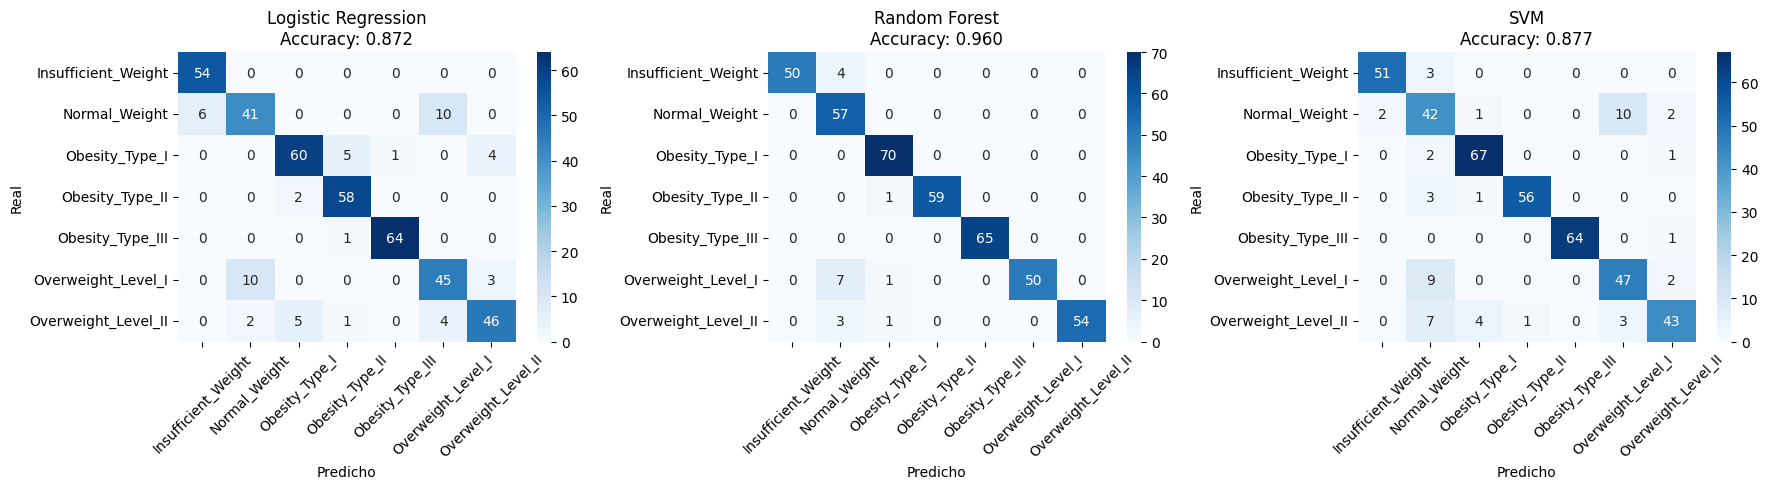

In [164]:
# Visualizar matrices de confusión
predictions = {
    'Logistic Regression': y_pred_lr,
    'Random Forest': y_pred_rf,
    'SVM': y_pred_svm
}

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for idx, (name, y_pred) in enumerate(predictions.items()):
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[idx],
                xticklabels=le_target.classes_, yticklabels=le_target.classes_)
    axes[idx].set_title(f'{name}\nAccuracy: {results[name]["accuracy"]:.3f}')
    axes[idx].set_xlabel('Predicho')
    axes[idx].set_ylabel('Real')
    axes[idx].tick_params(axis='x', rotation=45)
    axes[idx].tick_params(axis='y', rotation=0)

plt.tight_layout()
plt.savefig('images/confusion_matrices.png', dpi=300, bbox_inches='tight')
plt.show()

## 5. Validación Cruzada

In [165]:
from sklearn.model_selection import cross_validate

# Modelos para CV
models_cv = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1),
    'SVM': SVC(kernel='rbf', C=1.0, random_state=42)
}

cv_results = {}

print("=" * 60)
print("VALIDACIÓN CRUZADA (5-Fold)")
print("=" * 60)

for name, model in models_cv.items():
    cv = cross_validate(
        model, X_train_scaled, y_train,
        cv=5,
        scoring=['accuracy', 'precision_weighted', 'recall_weighted', 'f1_weighted'],
        n_jobs=-1
    )
    
    cv_results[name] = {
        'accuracy_mean': cv['test_accuracy'].mean(),
        'accuracy_std': cv['test_accuracy'].std(),
        'f1_mean': cv['test_f1_weighted'].mean(),
        'f1_std': cv['test_f1_weighted'].std()
    }
    
    print(f"\n{name}:")
    print(f"  Accuracy: {cv['test_accuracy'].mean():.4f} ± {cv['test_accuracy'].std():.4f}")
    print(f"  F1-Score: {cv['test_f1_weighted'].mean():.4f} ± {cv['test_f1_weighted'].std():.4f}")

VALIDACIÓN CRUZADA (5-Fold)

Logistic Regression:
  Accuracy: 0.8749 ± 0.0128
  F1-Score: 0.8733 ± 0.0134

Random Forest:
  Accuracy: 0.9455 ± 0.0121
  F1-Score: 0.9462 ± 0.0119

SVM:
  Accuracy: 0.8583 ± 0.0096
  F1-Score: 0.8591 ± 0.0092


## 6. Pipeline y Optimización de Hiperparámetros

In [166]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

# Crear pipeline con el mejor modelo base
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', RandomForestClassifier(random_state=42, n_jobs=-1))
])

# Parámetros a optimizar
param_grid = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__max_depth': [None, 10, 20, 30],
    'classifier__min_samples_split': [2, 5, 10]
}

print("Iniciando GridSearchCV...")
print(f"Combinaciones a evaluar: {3*4*3} = 36")

# Grid Search
grid_search = GridSearchCV(
    pipe, param_grid,
    cv=5,
    scoring='f1_weighted',
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train, y_train)

Iniciando GridSearchCV...
Combinaciones a evaluar: 36 = 36
Fitting 5 folds for each of 36 candidates, totalling 180 fits


,"estimator estimator: estimator objectThis is assumed to implement the scikit-learn estimator interface.Either estimator needs to provide a ``score`` function,or ``scoring`` must be passed.",Pipeline(step...m_state=42))])
,"param_grid param_grid: dict or list of dictionariesDictionary with parameters names (`str`) as keys and lists ofparameter settings to try as values, or a list of suchdictionaries, in which case the grids spanned by each dictionaryin the list are explored. This enables searching over any sequenceof parameter settings.","{'classifier__max_depth': [None, 10, ...], 'classifier__min_samples_split': [2, 5, ...], 'classifier__n_estimators': [50, 100, ...]}"
,"scoring scoring: str, callable, list, tuple or dict, default=NoneStrategy to evaluate the performance of the cross-validated model onthe test set.If `scoring` represents a single score, one can use:- a single string (see :ref:`scoring_string_names`);- a callable (see :ref:`scoring_callable`) that returns a single value;- `None`, the `estimator`'s :ref:`default evaluation criterion ` is used.If `scoring` represents multiple scores, one can use:- a list or tuple of unique strings;- a callable returning a dictionary where the keys are the metric names and the values are the metric scores;- a dictionary with metric names as keys and callables as values.See :ref:`multimetric_grid_search` for an example.",'f1_weighted'
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionchanged:: v0.20 `n_jobs` default changed from 1 to None",-1
,"refit refit: bool, str, or callable, default=TrueRefit an estimator using the best found parameters on the wholedataset.For multiple metric evaluation, this needs to be a `str` denoting thescorer that would be used to find the best parameters for refittingthe estimator at the end.Where there are considerations other than maximum score inchoosing a best estimator, ``refit`` can be set to a function whichreturns the selected ``best_index_`` given ``cv_results_``. In thatcase, the ``best_estimator_`` and ``best_params_`` will be setaccording to the returned ``best_index_`` while the ``best_score_``attribute will not be available.The refitted estimator is made available at the ``best_estimator_``attribute and permits using ``predict`` directly on this``GridSearchCV`` instance.Also for multiple metric evaluation, the attributes ``best_index_``,``best_score_`` and ``best_params_`` will only be available if``refit`` is set and all of them will be determined w.r.t this specificscorer.See ``scoring`` parameter to know more about multiple metricevaluation.See :ref:`sphx_glr_auto_examples_model_selection_plot_grid_search_digits.py`to see how to design a custom selection strategy using a callablevia `refit`.See :ref:`this example`for an example of how to use ``refit=callable`` to balance modelcomplexity and cross-validated score... versionchanged:: 0.20 Support for callable added.",True
,"cv cv: int, cross-validation generator or an iterable, default=NoneDetermines the cross-validation splitting strategy.Possible inputs for cv are:- None, to use the default 5-fold cross validation,- integer, to specify the number of folds in a `(Stratified)KFold`,- :term:`CV splitter`,- An iterable yielding (train, test) splits as arrays of indices.For integer/None inputs, if the estimator is a classifier and ``y`` iseither binary or multiclass, :class:`StratifiedKFold` is used. In allother cases, :class:`KFold` is used. These splitters are instantiatedwith `shuffle=False` so the splits will be the same across calls.Refer :ref:`User Guide ` for the variouscross-validation strategies that can be used here... versionchanged:: 0.22 ``cv`` default value if None changed from 3-fold to 5-fold.",5
,"verbose verbose: intControls the verbosity: the higher, the more messages.- >1 : the computation time for each 

In [167]:
# Resultados de optimización
print("=" * 60)
print("RESULTADOS DE OPTIMIZACIÓN")
print("=" * 60)
print(f"\nMejores parámetros:")
for param, value in grid_search.best_params_.items():
    print(f"  {param}: {value}")

print(f"\nMejor F1-Score (CV): {grid_search.best_score_:.4f}")

# Evaluar en test
y_pred_optimized = grid_search.predict(X_test)
acc_optimized = accuracy_score(y_test, y_pred_optimized)
f1_optimized = f1_score(y_test, y_pred_optimized, average='weighted')

print(f"\nRendimiento en Test:")
print(f"  Accuracy: {acc_optimized:.4f}")
print(f"  F1-Score: {f1_optimized:.4f}")

RESULTADOS DE OPTIMIZACIÓN

Mejores parámetros:
  classifier__max_depth: 20
  classifier__min_samples_split: 2
  classifier__n_estimators: 200

Mejor F1-Score (CV): 0.9463

Rendimiento en Test:
  Accuracy: 0.9502
  F1-Score: 0.9508


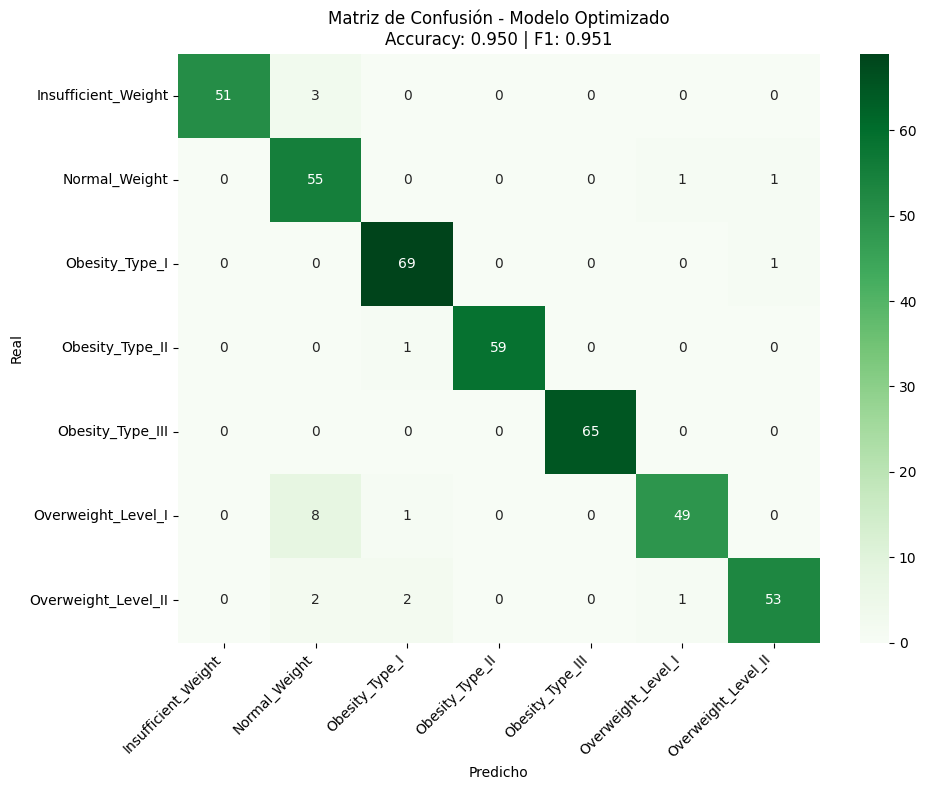


Classification Report (Modelo Optimizado):
                     precision    recall  f1-score   support

Insufficient_Weight       1.00      0.94      0.97        54
      Normal_Weight       0.81      0.96      0.88        57
     Obesity_Type_I       0.95      0.99      0.97        70
    Obesity_Type_II       1.00      0.98      0.99        60
   Obesity_Type_III       1.00      1.00      1.00        65
 Overweight_Level_I       0.96      0.84      0.90        58
Overweight_Level_II       0.96      0.91      0.94        58

           accuracy                           0.95       422
          macro avg       0.95      0.95      0.95       422
       weighted avg       0.95      0.95      0.95       422



In [168]:
# Matriz de confusión del modelo optimizado
cm_optimized = confusion_matrix(y_test, y_pred_optimized)

plt.figure(figsize=(10, 8))
sns.heatmap(cm_optimized, annot=True, fmt='d', cmap='Greens',
            xticklabels=le_target.classes_, yticklabels=le_target.classes_)
plt.title(f'Matriz de Confusión - Modelo Optimizado\nAccuracy: {acc_optimized:.3f} | F1: {f1_optimized:.3f}')
plt.xlabel('Predicho')
plt.ylabel('Real')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('images/confusion_matrix_optimized.png', dpi=300, bbox_inches='tight')
plt.show()

print("\nClassification Report (Modelo Optimizado):")
print(classification_report(y_test, y_pred_optimized, target_names=le_target.classes_))

## 7. Resumen y Conclusiones

In [169]:
print("=" * 70)
print("RESUMEN FINAL")
print("=" * 70)

print("\n📊 DATASET:")
print(f"   - Nombre: Estimation of Obesity Levels")
print(f"   - Muestras: {len(df)}")
print(f"   - Features: {len(X.columns)}")
print(f"   - Clases: {len(le_target.classes_)}")

print("\n🔧 PREPROCESAMIENTO:")
print(f"   - Encoding categóricas: Label + One-Hot")
print(f"   - Escalado: StandardScaler")
print(f"   - Split: 80% train / 20% test (estratificado)")

print("\n📈 RESULTADOS:")
print(results_df.to_string())

print(f"\n🏆 MEJOR MODELO: {best_model}")
print(f"   - Accuracy: {results[best_model]['accuracy']:.4f}")
print(f"   - F1-Score: {results[best_model]['f1']:.4f}")

print(f"\n⚡ MODELO OPTIMIZADO (Random Forest + GridSearch):")
print(f"   - Accuracy: {acc_optimized:.4f}")
print(f"   - F1-Score: {f1_optimized:.4f}")

RESUMEN FINAL

📊 DATASET:
   - Nombre: Estimation of Obesity Levels
   - Muestras: 2109
   - Features: 16
   - Clases: 7

🔧 PREPROCESAMIENTO:
   - Encoding categóricas: Label + One-Hot
   - Escalado: StandardScaler
   - Split: 80% train / 20% test (estratificado)

📈 RESULTADOS:
                     accuracy  precision  recall      f1
Logistic Regression    0.8720     0.8708  0.8720  0.8705
Random Forest          0.9597     0.9665  0.9597  0.9605
SVM                    0.8768     0.8833  0.8768  0.8786

🏆 MEJOR MODELO: Random Forest
   - Accuracy: 0.9597
   - F1-Score: 0.9605

⚡ MODELO OPTIMIZADO (Random Forest + GridSearch):
   - Accuracy: 0.9502
   - F1-Score: 0.9508
